In [66]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(1000)

# Create and scale dataset
X, _ = make_blobs(n_samples=500, centers=2, cluster_std=5.0, random_state=1000)

scaler = StandardScaler(with_std=False)
Xs = scaler.fit_transform(X)

# Compute eigenvalues and eigenvectors
Q = np.cov(Xs.T)
eigu, eigv = np.linalg.eig(Q)

# Apply the Oja's rule
W_oja = np.random.normal(scale=0.25, size=(2, 1))
prev_W_oja = np.ones((2, 1))

learning_rate = 0.001

In [67]:
X.shape

(500, 2)

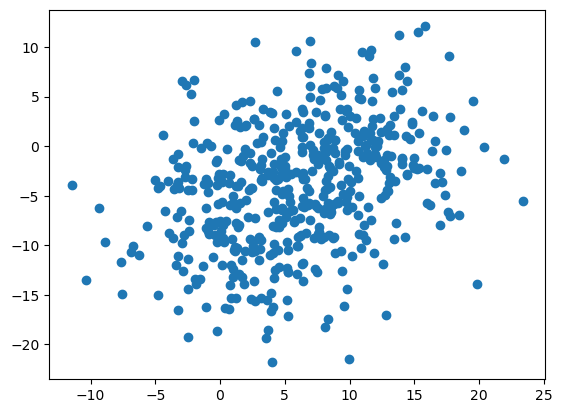

In [68]:
plt.figure()
plt.scatter(X[:,0], X[:,1])

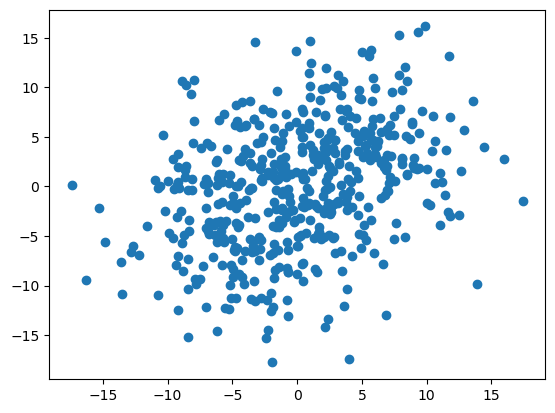

In [69]:
plt.figure()
plt.scatter(Xs[:,0], Xs[:,1])

In [70]:
Q

array([[34.94435892, 12.10674377],
       [12.10674377, 38.55858945]])

In [71]:
eigv

array([[-0.75750566, -0.6528286 ],
       [ 0.6528286 , -0.75750566]])

In [72]:
W_oja_init = W_oja.copy()

In [73]:
W_oja_init

array([[-0.20111458],
       [ 0.08023289]])

In [74]:
def W_norm(W):
    return np.sum(np.square(W))

In [75]:
W_norm(W_oja_init)

0.046884388751718555

In [76]:
W_oja = W_oja_init.copy()
W_norm_history = []
Y_history = []
epochs = 2
for epoch in range(epochs):
    for i in range(Xs.shape[0]):
        xs = Xs[i]
        prev_W_oja = W_oja.copy()
        
        Ys = np.dot(xs, W_oja)
        Y_history.append(Ys)
        W_oja += learning_rate * np.sum(Ys*xs - np.square(Ys)*W_oja.T, axis=0).reshape((2, 1))
        W_norm_history.append(W_norm(W_oja))

In [77]:
W_oja

array([[-0.62064844],
       [-0.79143163]])

In [78]:
W_norm(W_oja)

1.0115685000122314

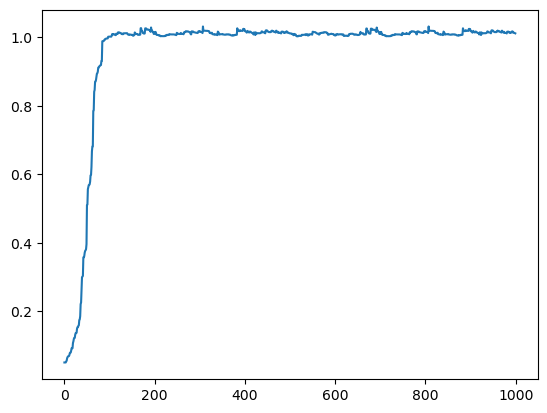

In [79]:
plt.figure()
plt.plot(W_norm_history)

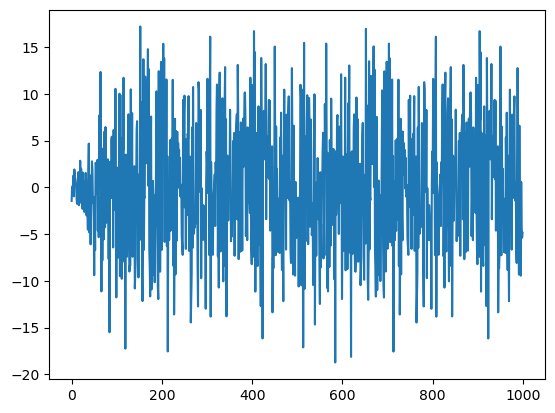

In [80]:
plt.figure()
plt.plot(Y_history)

In [82]:
Y_history[-10:]

[array([2.29643882]),
 array([-9.32794009]),
 array([6.60180578]),
 array([-4.55816142]),
 array([-5.5651802]),
 array([-9.45033804]),
 array([0.59153099]),
 array([-4.15688158]),
 array([-5.39621496]),
 array([-4.85966478])]

In [83]:
W_oja

array([[-0.62064844],
       [-0.79143163]])

In [84]:
eigv

array([[-0.75750566, -0.6528286 ],
       [ 0.6528286 , -0.75750566]])